# Objective:

## Predicting Taxi fare on the basis of features like longitute ,
## lattitude, passenger count, day, time 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ! pip install datatable

# Importing Dataset

In [3]:
import datatable as dt   # Importing datatable to reduce importing time as pandas is takes a lot of time   
import pandas as pd

tps_dt = dt.fread("train.csv").to_pandas()
tps_dt.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
sample_df = tps_dt.sample(int(len(tps_dt) * 0.005))  # Taking sample of big dataset(2lakh rows instead of 55M)
sample_df.shape

(277119, 8)

# Importing Test Dataset

In [6]:
test=pd.read_csv('test.csv')
test.shape

(9914, 7)

In [7]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


# Visualization

<AxesSubplot:xlabel='passenger_count', ylabel='Count'>

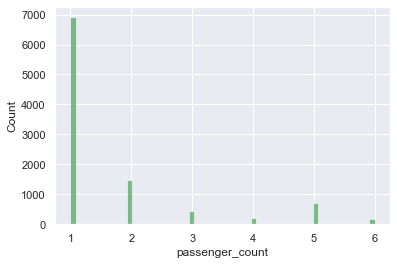

In [8]:
sns.histplot(test['passenger_count'],color='g')

In [10]:
import datetime
sample_df['pickup_datetime']=pd.to_datetime(sample_df['pickup_datetime'])

In [12]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277119 entries, 11467335 to 30334017
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                277119 non-null  datetime64[ns]     
 1   fare_amount        277119 non-null  float64            
 2   pickup_datetime    277119 non-null  datetime64[ns, UTC]
 3   pickup_longitude   277119 non-null  float64            
 4   pickup_latitude    277119 non-null  float64            
 5   dropoff_longitude  277117 non-null  float64            
 6   dropoff_latitude   277117 non-null  float64            
 7   passenger_count    277119 non-null  int32              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(5), int32(1)
memory usage: 18.0 MB


<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

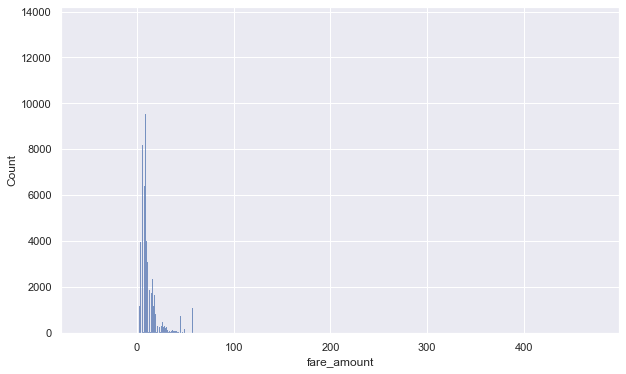

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(sample_df['fare_amount'])

In [27]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277119 entries, 11467335 to 30334017
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        277119 non-null  float64            
 1   pickup_datetime    277119 non-null  datetime64[ns, UTC]
 2   pickup_longitude   277119 non-null  float64            
 3   pickup_latitude    277119 non-null  float64            
 4   dropoff_longitude  277117 non-null  float64            
 5   dropoff_latitude   277117 non-null  float64            
 6   passenger_count    277119 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(5), int32(1)
memory usage: 23.9 MB


In [26]:
sample_df.drop('key',inplace=True,axis=1)   # As i

In [36]:
sample_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,277103.000000,277103.000000,277103.000000,277101.000000,277101.000000,277103.000000
mean,11.338010,-72.511415,39.933531,-72.515823,39.941047,1.679585
std,9.853313,12.464690,9.333827,12.760382,6.542790,1.302621
min,0.010000,-1991.186175,-2099.752588,-1680.290985,-461.143928,0.000000
25%,6.000000,-73.992084,40.734963,-73.991385,40.734104,1.000000
50%,8.500000,-73.981795,40.752667,-73.980167,40.753161,1.000000
75%,12.500000,-73.967072,40.767187,-73.963738,40.768065,2.000000
max,472.530000,2842.457363,2973.970450,2842.457363,908.946212,6.000000


## Removing rows where fare amount is negative

sample_df=sample_df[sample_df['fare_amount']>0]   
sample_df.shape

In [45]:
sample_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday
11467335,5.7,2012-08-27 16:25:29+00:00,-73.967373,40.772396,-73.957753,40.765392,3,2012,8,27,16,0
29012880,3.7,2009-04-30 16:07:00+00:00,-73.954247,40.769863,-73.950360,40.775290,1,2009,4,30,16,3
52016281,5.3,2012-03-01 18:01:08+00:00,-73.988492,40.778815,-73.988492,40.778815,1,2012,3,1,18,3
25221185,8.9,2010-04-15 00:10:24+00:00,-73.991822,40.726089,-73.986066,40.755513,1,2010,4,15,0,3
34320303,9.3,2011-04-22 20:07:13+00:00,-73.994482,40.755983,-74.000583,40.727168,2,2011,4,22,20,4


In [40]:
sample_df['year']=sample_df['pickup_datetime'].apply(lambda x:x.year)

In [41]:
sample_df['month']=sample_df['pickup_datetime'].apply(lambda x:x.month)

In [42]:
sample_df['day']=sample_df['pickup_datetime'].apply(lambda x:x.day)

In [43]:
sample_df['hour']=sample_df['pickup_datetime'].apply(lambda x:x.hour)

In [44]:
sample_df['weekday']=sample_df['pickup_datetime'].apply(lambda x:x.weekday)

In [48]:
sample_df.drop('pickup_datetime',axis=1,inplace=True)

In [49]:
sample_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday
11467335,5.7,-73.967373,40.772396,-73.957753,40.765392,3,2012,8,27,16,0
29012880,3.7,-73.954247,40.769863,-73.950360,40.775290,1,2009,4,30,16,3
52016281,5.3,-73.988492,40.778815,-73.988492,40.778815,1,2012,3,1,18,3
25221185,8.9,-73.991822,40.726089,-73.986066,40.755513,1,2010,4,15,0,3
34320303,9.3,-73.994482,40.755983,-74.000583,40.727168,2,2011,4,22,20,4


In [55]:
sample_df.dropna(inplace=True)

In [56]:
x=sample_df.drop('fare_amount',axis=1)

In [57]:
y=sample_df.fare_amount

In [58]:
y.head()

11467335    5.7
29012880    3.7
52016281    5.3
25221185    8.9
34320303    9.3
Name: fare_amount, dtype: float64

In [59]:
sample_df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
hour                 0
weekday              0
dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [106]:

model=[['model1',DecisionTreeRegressor()],['model2',LinearRegression()],
       ['model3',GradientBoostingRegressor()],
       ['model4',RandomForestRegressor()] ] 

for i,j in model:
    i=j.fit(xtrain,ytrain)
    pred=i.predict(xtest)
    print(np.sqrt(mean_squared_error(ytest,pred)))

6.686030659122105
10.00970009686119
5.76659207516004
5.028848596162754


### Here we can clearly see model3(GradientBoostingRegressor) and model4(RandomForestRegressor) are giving us least Root mean square error.

In [109]:
Predicted_values=Final_model.predict(xtest)
Predicted_values

array([ 5.82  ,  8.09  , 20.84  , ..., 13.5571,  9.12  ,  6.76  ])

In [ ]:
_____________________________________________END_________________________________________________